In [1]:
import torch
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
from optimize import optimize

In [19]:
dom = '1a02F00'
losses = []
histories = {}

for i, f in enumerate(os.listdir(f'../../steps/folded_structures/optimized/{dom}/')):
    rs = f.split('_')[1]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        losses.append([int(rs), float(temp['loss'])])
        histories[rs] = temp['history']

losses = np.array(losses)

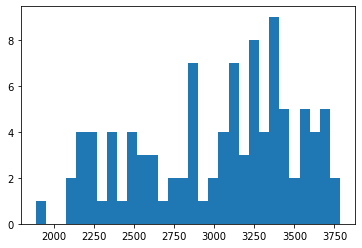

In [3]:
plt.hist(losses[:, 1], bins=30);

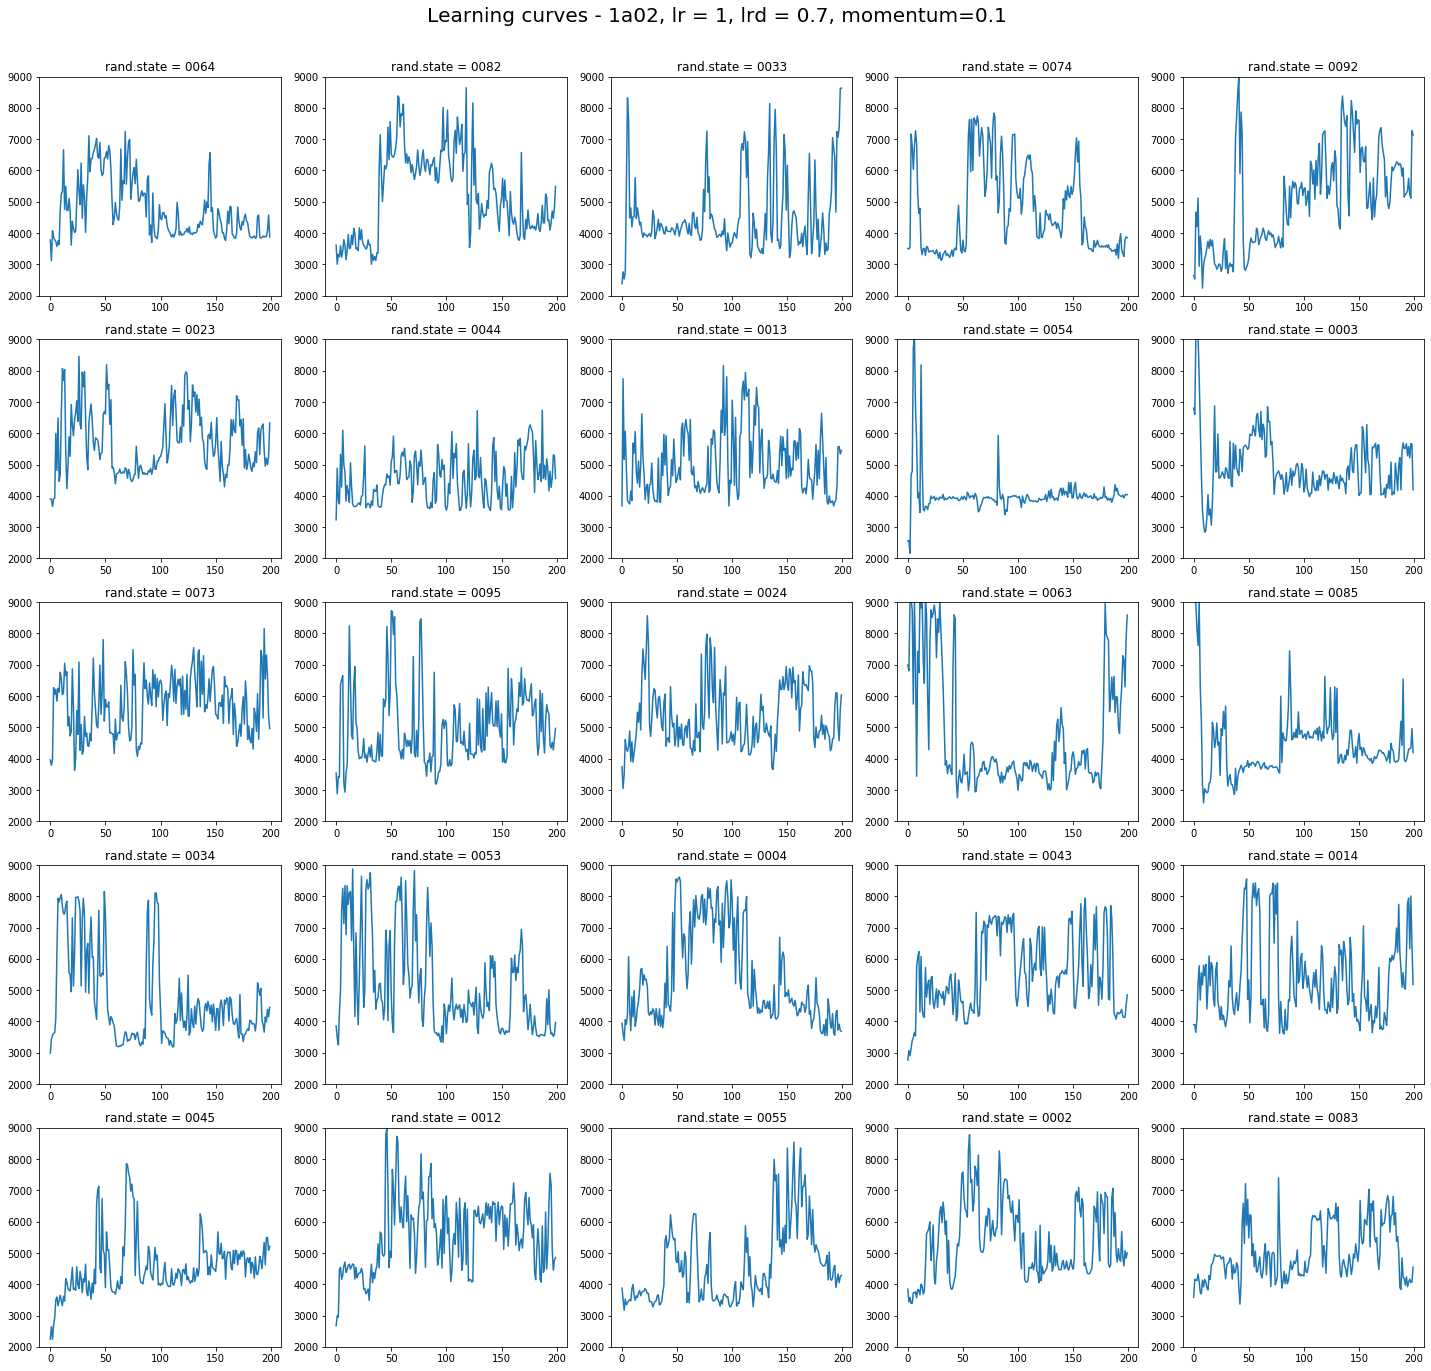

In [32]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        temp_hist = np.array(histories[list(histories.keys())[5 * i + j]])
        ax[i, j].plot(temp_hist[:, 0], temp_hist[:, 1])
        ax[i, j].set_ylim(2000, 9000)
        ax[i, j].set_title(f'rand.state = {list(histories.keys())[5 * i + j]}')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Learning curves - 1a02, lr = 1, lrd = 0.7, momentum=0.1', fontsize=20)

plt.savefig('../../plots/structure_realization/1a02_learning_curves.png')


In [8]:
with open(f'../../steps/folded_structures/optimized/1a02F00/1a02F00_0058_pred.pkl', 'rb') as s:
        temp = pickle.load(s)
        h = temp['history']

In [9]:
h

[[0, 1887.044677734375],
 [1, 2084.671630859375],
 [2, 2557.989013671875],
 [3, 2584.524658203125],
 [4, 2897.309326171875],
 [5, 3073.452880859375],
 [6, 2482.423583984375],
 [7, 2925.822021484375],
 [8, 3065.394775390625],
 [9, 3173.435546875],
 [10, 3838.40380859375],
 [11, 4040.62744140625],
 [12, 4206.9541015625],
 [13, 7291.30078125],
 [14, 6297.95263671875],
 [15, 7519.08056640625],
 [16, 6953.0732421875],
 [17, 6235.59716796875],
 [18, 7228.55615234375],
 [19, 7582.93115234375],
 [20, 5469.84375],
 [21, 7011.17333984375],
 [22, 7868.5634765625],
 [23, 4764.5126953125],
 [24, 4039.95947265625],
 [25, 4663.93603515625],
 [26, 6707.47802734375],
 [27, 7498.654296875],
 [28, 7116.87060546875],
 [29, 6761.8212890625],
 [30, 7847.6005859375],
 [31, 6681.625],
 [32, 6494.58935546875],
 [33, 5680.09326171875],
 [34, 4587.7490234375],
 [35, 4484.431640625],
 [36, 4168.951171875],
 [37, 4472.6298828125],
 [38, 4309.76904296875],
 [39, 4355.04443359375],
 [40, 4085.64453125],
 [41, 4474.3

# Pick 10 best structures

In [4]:
best = losses[np.argsort(losses[:, 1])][:10]
best

array([[  58.        , 1887.04467773],
       [  69.        , 2083.41137695],
       [  76.        , 2084.42895508],
       [  60.        , 2149.49194336],
       [  54.        , 2165.37182617],
       [  17.        , 2175.22436523],
       [  35.        , 2183.79663086],
       [  25.        , 2208.60693359],
       [  50.        , 2226.25830078],
       [  92.        , 2239.57519531]])

# L-BFGS

In [7]:
dom = '1a02F00'
losses = []
histories = {}

for f in os.listdir(f'../../steps/folded_structures/optimized/{dom}/'):
    rs = f.split('_')[1].split('.')[0]
    with open(f'../../steps/folded_structures/optimized/{dom}/{f}', 'rb') as s:
        temp = pickle.load(s)
        losses.append([int(rs), float(temp['loss'])])
        histories[rs] = temp['history']

losses = np.array(losses)

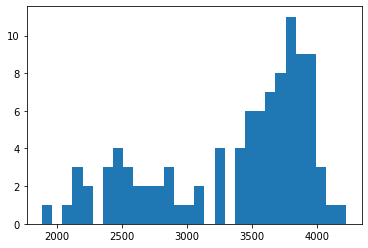

In [9]:
plt.hist(losses[:, 1], bins=30);

Text(0.5, 0.98, 'Learning curves - 1a02, LBFGS - 20 iterations')

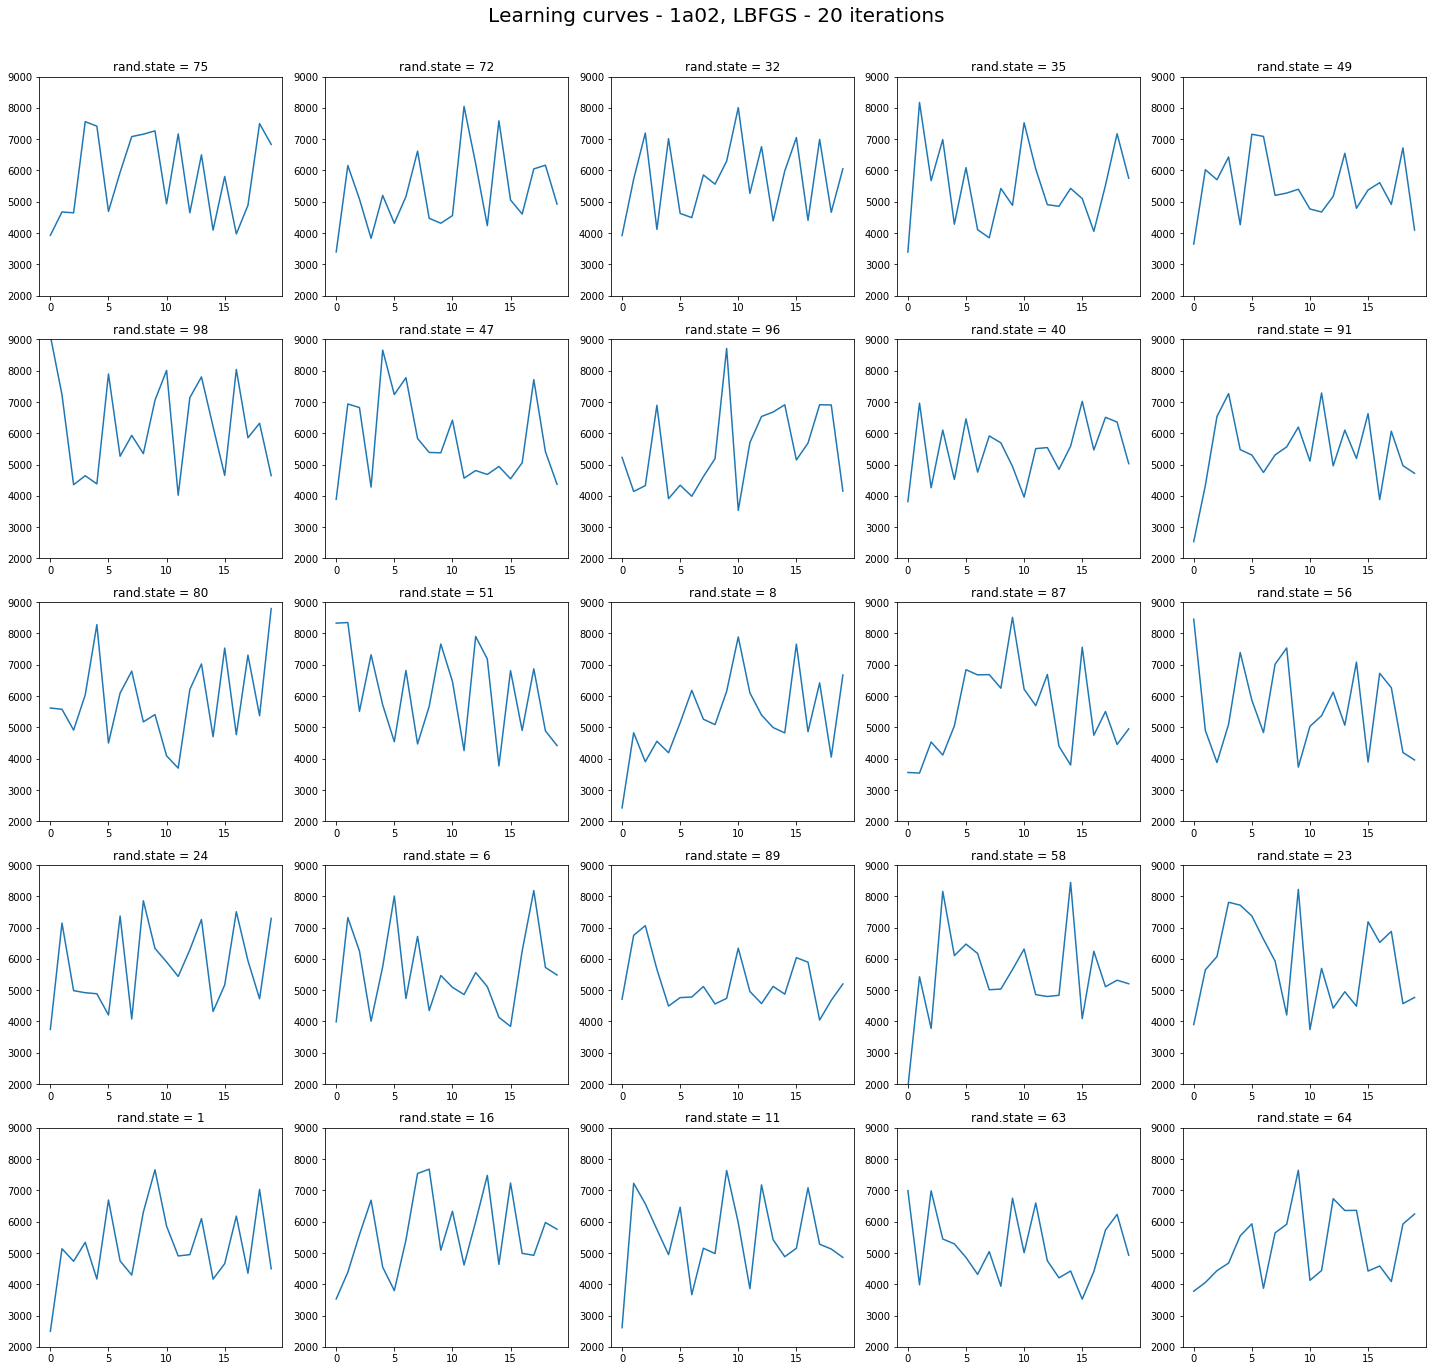

In [11]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(5):
    for j in range(5):
        temp_hist = np.array(histories[list(histories.keys())[5 * i + j]])
        ax[i, j].plot(temp_hist[:, 0], temp_hist[:, 1])
        ax[i, j].set_ylim(2000, 9000)
        ax[i, j].set_title(f'rand.state = {list(histories.keys())[5 * i + j]}')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle('Learning curves - 1a02, LBFGS - 20 iterations', fontsize=20)

plt.savefig('../../plots/structure_realization/1a02_lbfgs_learning_curves.png')

# Refinement

The purpose of this step is to allow for "finer" optimization. I am going to run 10 different optimization plans for each one of the best structures for 200 iterations. These plans are:

01. lr = 0.1, lr_decay=0.7, momentum=0.1
02. lr = 0.1, lr_decay=0.7, momentum=0.3
03. lr = 0.1, lr_decay=0.7, momentum=0.5
04. lr = 0.1, lr_decay=0.5, momentum=0.3
05. lr = 0.1, lr_decay=0.5, momentum=0.5

06. lr = 0.01, lr_decay=0.7, momentum=0.3
07. lr = 0.01, lr_decay=0.7, momentum=0.5
08. lr = 0.01, lr_decay=0.7, momentum=0.1

09. lr = 0.001, lr_decay=0.7, momentum=0.3
10. lr = 0.001, lr_decay=0.7, momentum=0.5

In [5]:
ls ../../steps/folded_structures/optimized/

16pkA01/  1a02F00/  hyperparameters  temp_16pkA01/  temp_1a02F00/


In [18]:
a = optimize('1a02F00', 
             '../../steps/folded_structures/optimized/1a02F00/1a02F00_0058_pred.pkl',
            lr=0.01, lr_decay=, momentum=0.2, verbose=1)

Iteration 0, Loss: 2084.671630859375
Iteration 1, Loss: 2543.832763671875
Iteration 2, Loss: 2516.469482421875


KeyboardInterrupt: 